In [1]:
%matplotlib notebook
from IPython.display import Latex
from PyFoam.RunDictionary.SolutionDirectory import SolutionDirectory
from PyFoam.RunDictionary.ParsedParameterFile import ParsedParameterFile
from PyFoam.Basics.DataStructures import Vector
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import os,shutil,glob
import pylab, re
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [7]:
A = pd.read_excel('/home/andres/Documents/GitHub/alaBatiente/Resultados/ResultadosPostanewDomain.xlsx',
                  usecols="F:H",nrows=6,skiprows=17)   
data = A.to_numpy()

In [8]:
f_adim,delta_adim,CD = data.T
print(f_adim)
print(delta_adim)

[0.6028636 0.7535795 0.9042954 1.0550113 1.2057272 1.3564431]
[1.57635144 1.89660307 1.88238211 1.56078677 1.21845985 0.9329848 ]


<IPython.core.display.Javascript object>


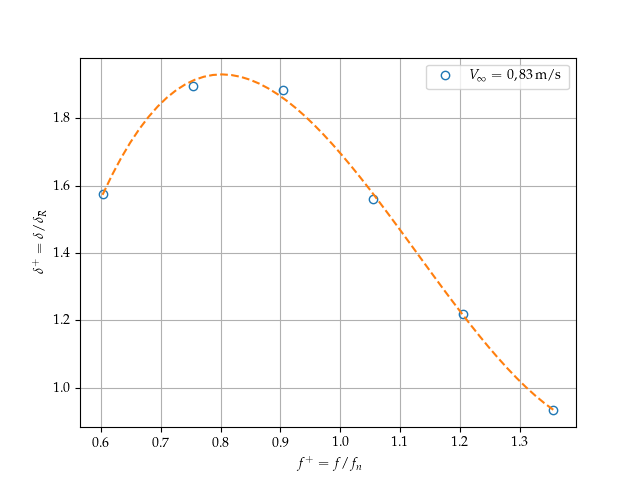

In [9]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
ax.plot(f_adim,delta_adim,'o',markersize=6,label='$V_\infty=0,83\,$m/s',fillstyle='none')
ax.set_xlabel(r'$f^+=f/f_n$')
ax.set_ylabel(r'$\delta^+=\delta /\delta_R$')
ax.grid()
ax.legend()
z=np.polyfit(f_adim[0:5], delta_adim[0:5], 3)
f=np.poly1d(z)
f_c = np.linspace(f_adim[0],f_adim[-1],50)
d_c = f(f_c)
index_max = d_c.argmax()
ax.plot(f_c,d_c,linestyle='dashed')
plt.savefig('DesplazamientoVsFrecuencia.pdf') 
plt.savefig('DesplazamientoVsFrecuencia.png') 

<IPython.core.display.Javascript object>


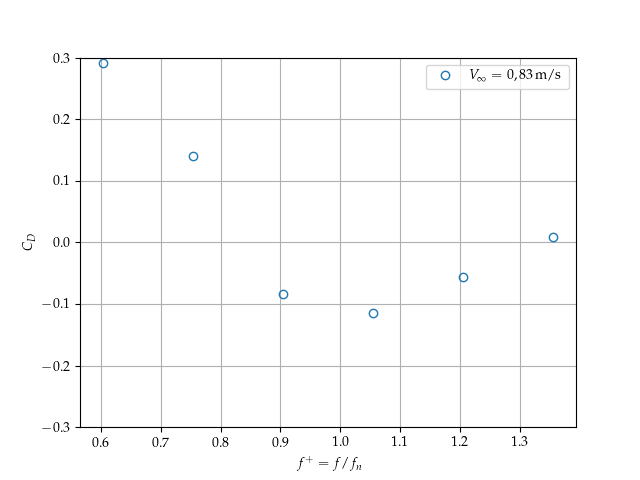

In [10]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fig,ax = plt.subplots()
ax.plot(f_adim,CD,'o',markersize=6,label='$V_\infty=0,83\,$m/s',fillstyle='none')
ax.set_xlabel(r'$f^+=f/f_n$')
ax.set_ylabel('$C_D$')
ax.grid()
ax.legend()
ax.set_ylim(-0.3,0.3)
plt.savefig('CDVsFrecuencia.pdf') 
plt.savefig('CDVsFrecuencia.png') 